In [41]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
file      = "UNdata_TradeGoods_Coffee&Tea.csv"
file1     = "UNdata_TradeGoods_Spices1.csv"
file2     = "UNdata_TradeGoods_Spices2.csv"


In [42]:
application_df  = pd.read_csv(file, index_col =1)
application1_df = pd.read_csv(file1, index_col = 1)
application2_df = pd.read_csv(file2, index_col = 1)

application_df.head(10)

,Country or Area Code,Year,Commodity,Flow,Trade (USD),Weight (kg),Trade by Weight (USD per Kg)
Country or Area,,,,,,,
Afghanistan,4,2018,"Coffee, not roasted, decaffeinated",Import,288818.29,33242.00,8.69
Afghanistan,4,2018,"Tea, green (unfermented) in packages < 3 kg",Import,60505888.60,39477846.10,1.53
Afghanistan,4,2018,"Tea, green (unfermented) in packages < 3 kg",Export,24985.13,11030.00,2.27
Afghanistan,4,2018,"Tea, green (unfermented) in packages < 3 kg",Re-Export,24558.75,10910.00,2.25
Afghanistan,4,2018,"Tea, black (fermented or partly) in packages <...",Import,85604441.18,41318170.24,2.07
Afghanistan,4,2018,"Tea, black (fermented or partly) in packages <...",Export,45844.69,32892.00,1.39
Afghanistan,4,2018,"Tea, black (fermented or partly) in packages <...",Re-Export,45844.69,32892.00,1.39
Afghanistan,4,2016,"Tea, green (unfermented) in packages < 3 kg",Import,44819548.00,28093001.00,1.6
Afghanistan,4,2016,"Tea, black (fermented or partly) in packages <...",Import,44851687.00,23509706.00,1.91


In [43]:
# Drop the non-beneficial ID columns,'Country or Area code'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(['Country or Area Code'],1)

application_df.head()

C:\Users\thanh\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,Commodity,Flow,Trade (USD),Weight (kg),Trade by Weight (USD per Kg)
Country or Area,,,,,,
Afghanistan,2018,"Coffee, not roasted, decaffeinated",Import,288818.29,33242.00,8.69
Afghanistan,2018,"Tea, green (unfermented) in packages < 3 kg",Import,60505888.60,39477846.10,1.53
Afghanistan,2018,"Tea, green (unfermented) in packages < 3 kg",Export,24985.13,11030.00,2.27
Afghanistan,2018,"Tea, green (unfermented) in packages < 3 kg",Re-Export,24558.75,10910.00,2.25
Afghanistan,2018,"Tea, black (fermented or partly) in packages <...",Import,85604441.18,41318170.24,2.07


In [44]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

Year                               32
Commodity                          10
Flow                                4
Trade (USD)                     53729
Weight (kg)                     45047
Trade by Weight (USD per Kg)     3951
dtype: int64

In [51]:
# Look at Flow value counts for binning
flow_count = application_df.Flow.value_counts()

flow_count

Import       34169
Export       24144
Re-Export     3563
Re-Import     1069
Name: Flow, dtype: int64

<AxesSubplot:ylabel='Density'>

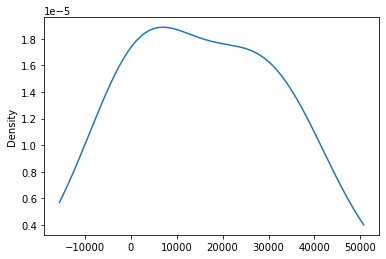

In [52]:
# Visualize the value counts of Year
flow_count.plot.density()

In [55]:
# Determine which values to replace if counts are less than ...?
replace_flow = list(flow_count[flow_count < 500].index)
# Replace in dataframe
for app in replace_flow:
    application_df.flow = application_df.Flow.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.Flow.value_counts()

Import       34169
Export       24144
Re-Export     3563
Re-Import     1069
Name: Flow, dtype: int64

In [72]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()

application_df[application_cat].nunique()

Series([], dtype: float64)

In [73]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\thanh\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


""


In [76]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index = True,
                                                 right_index = True)

application_df = application_df.drop(application_cat,1)

application_df.head()

C:\Users\thanh\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,Year,Trade (USD),Weight (kg),Commodity_Coffee husks and skins_x,Commodity_Coffee substitutes containing coffee_x,"Commodity_Coffee, not roasted, decaffeinated_x","Commodity_Coffee, not roasted, not decaffeinated_x","Commodity_Coffee, roasted, decaffeinated_x","Commodity_Coffee, roasted, not decaffeinated_x","Commodity_Tea, black (fermented or partly) in packages < 3 kg_x",...,Trade by Weight (USD per Kg)_97.36_y,Trade by Weight (USD per Kg)_9718.04_y,Trade by Weight (USD per Kg)_98.1_y,Trade by Weight (USD per Kg)_98.37_y,Trade by Weight (USD per Kg)_98.5_y,Trade by Weight (USD per Kg)_98.72_y,Trade by Weight (USD per Kg)_98.75_y,Trade by Weight (USD per Kg)_98.93_y,Trade by Weight (USD per Kg)_99.67_y,Trade by Weight (USD per Kg)_99503_y
